Расчёты

In [1]:
#ввод данных
lst=[float(i.replace(',','.')) for i in input().split()] # исходные данные
print('Исходные данные')
print(' '.join([str(i) for i in lst]))

Исходные данные
5.0 3.0 2.0


In [9]:
#вычисление размаха и шага
import math
R=round(max(lst)-min(lst),2)
print(f'Размах вариации: {max(lst)} - {min(lst)} = {R}')
k=math.ceil(1+math.log(len(lst),2))
print(f'Оптимальное количество интервалов: 1 + (логорифм {len(lst)} по основанию 2) = {k}')
p=R/k
print(f'Шаг оптимального ряда = {round(p,2)}')
# вычисление узлов
knots=[]
for i in range(k+1):
    print(f'Узел {i+1}: {min(lst)} + ({i} * {p}) = {round(min(lst)+(i*p),2)}')
    knots.append(round(min(lst)+(i*p),2))
print(f'Узлы:\n{knots}')
f=[]
for i in range(len(knots)-1):
    tr,num=[],[]
    for g in lst:
        if knots[i]<=g<knots[i+1]:
            tr.append(1)
            num.append(g)
    print(f'В интервале ({knots[i]};{knots[i+1]}] частота (количество попаданий цифер в интервал) равна = {sum(tr)}. Какие номера попали: {" , ".join([str(i) for i in num])}')
    f.append(sum(tr))
print(f'Частоты:\n{f}')
print('Интервальный ряд')
print('-'*92)
print('Интервалы --- Число попаданий')
dic_row={f'[{knots[i]};{knots[i+1]})':str(g) for i,g in zip(range(len(knots)-1),f)}
for i,g in dic_row.items():
    print(i + ' ---  '+ g)
print('-'*92)
#выборочная средняя
av=[((knots[i]+knots[i+1])/2)*g for i,g in zip(range(len(knots)-1),f)]
av_av=round(sum(av)/len(lst),2)
print(f'Выборочная средняя (сумма середин интервалов ((х1-х0)/2), деленная на количество исходных данных) : {" + ". join([str(i) for i in av])} / {len(lst)} = {av_av}')
#смещенная выборочная дисперсия
pre_d, num1=[],[]
for i,g in zip(range(len(knots)-1),f):
    pre_d.append((((knots[i]+knots[i+1])/2)-av_av)**2*g)
    num1.append(f'((({(knots[i]+knots[i+1])/2}) - {av_av})^2 * {g})')
D=round((1/len(lst))*sum(pre_d),2)
print(f'Смещённая дисперсия: 1/N(кол-во исходных данных) * (сумма ряда (xi-Xср)^2*fi (i от 1 до k(количества интервалов) = 1 / {len(lst)}) * ({" + ".join(num1)}) = {D}')
#несмещённая дисперсия
D1=(len(lst)/(len(lst)-1))*D
print(f'Несмещённая дисперсия (кол-во исходных данных - N, D - смещённая дисперсия): N/N-1 * D = ({len(lst)}/({len(lst)}-1)) * {D} = {round(D1,2)}')
#стандартное отклонение
dev=math.sqrt(D1)
print(f'Выборочное стандартное отклонение: квадратный корень из несмещённой дисперсии = {round(dev,2)}')
#относительные частоты
rel_f=[round(fr/len(lst),2) for fr in f]
print(f'Относительные частоты (частота каждого интервала, делённая на количество исходных данных) = {" , ".join([str(i) for i in rel_f])}')
#плотности относительных частот
ro_relf,num2=[],[]
for i,g in zip(f,range(len(knots)-1)):
    num2.append(f'Плотность относительной частоты {g+1} узла = ({i}/{len(lst)} * |{knots[g]-knots[g+1]}|')               
    ro_relf.append(round(i/(len(lst)*abs(knots[g]-knots[g+1])),2))
print(f'Плотности относительных частот = {" , ".join([str(i) for i in ro_relf])}')
print(*num2,sep='\n')
#накопленные частоты
sum_mem=[]
sum_mem.append(f[0])
tr=f[0]
for i in range(1,len(f)):
    tr+=f[i]
    sum_mem.append(tr)
print(f'Накопленные частоты (суммы частот) = {" , ".join([str(i) for i in sum_mem])}')
#накопленные относительные частоты
sum_rel=[]
sum_rel.append(rel_f[0])
tr=round(rel_f[0],2)
for i in range(1,len(rel_f)):
    tr+=rel_f[i]
    tr=round(tr,2)
    sum_rel.append(tr)
print(f'Накопленные относительные частоты = {" , ".join([str(i) for i in sum_rel])}')
#мода
fm=max(f)
x0=knots[f.index(fm)]
fm1=f[f.index(fm)-1]
fm2=f[f.index(fm)+1]
moda=x0+((fm-fm1)/((fm-fm1)+(fm+fm2)))*p
print(f'Мода ряда равна x0+((fm-fm1)/((fm-fm1)+(fm+fm2)))*p(шаг ряда) = {x0}+(({fm-fm1})/(({fm-fm1})+({fm+fm2})))*{p} = {round(moda,2)}')
#медиана
ind=0
for i in range(len(sum_rel)):
    if sum_rel[i]>0.5:
        ind=i
        break
x0=knots[ind]
sme1=sum_rel[ind-1]
wme=rel_f[ind]
me=x0+((0.5-sme1)/wme)*p
print(f'Медиана ряда равна x0+((0.5-sme1)/wme)*p = {x0}+((0.5-{sme1})/{wme})*{p} = {round(me,2)}')

Размах вариации: 1.13 - -5.18 = 6.31
Оптимальное количество интервалов: 1 + (логорифм 50 по основанию 2) = 7
Шаг оптимального ряда = 0.9
Узел 1: -5.18 + (0 * 0.9014285714285714) = -5.18
Узел 2: -5.18 + (1 * 0.9014285714285714) = -4.28
Узел 3: -5.18 + (2 * 0.9014285714285714) = -3.38
Узел 4: -5.18 + (3 * 0.9014285714285714) = -2.48
Узел 5: -5.18 + (4 * 0.9014285714285714) = -1.57
Узел 6: -5.18 + (5 * 0.9014285714285714) = -0.67
Узел 7: -5.18 + (6 * 0.9014285714285714) = 0.23
Узел 8: -5.18 + (7 * 0.9014285714285714) = 1.13
Узлы:
[-5.18, -4.28, -3.38, -2.48, -1.57, -0.67, 0.23, 1.13]
В интервале (-5.18;-4.28] частота (количество попаданий цифер в интервал) равна = 2. Какие номера попали: -5.18 , -4.57
В интервале (-4.28;-3.38] частота (количество попаданий цифер в интервал) равна = 7. Какие номера попали: -4.17 , -3.48 , -4.21 , -3.93 , -3.97 , -4.07 , -3.82
В интервале (-3.38;-2.48] частота (количество попаданий цифер в интервал) равна = 10. Какие номера попали: -3.03 , -2.92 , -3.14 , -

Графики

In [3]:
import matplotlib.pyplot as plt

Обозначения: ось х - список ниже; ось у - относительные частоты
1 === [-5.18;-4.28)
2 === [-4.28;-3.38)
3 === [-3.38;-2.48)
4 === [-2.48;-1.57)
5 === [-1.57;-0.67)
6 === [-0.67;0.23)
7 === [0.23;1.13)


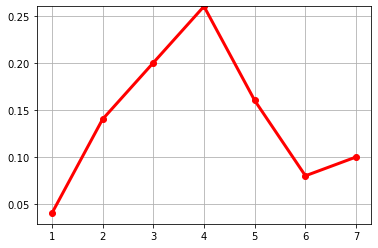

In [4]:
#полигон относительных частот
ind_lst=list(dic_row.keys())
line=plt.plot([i for i in range(1,len(ind_lst)+1)],rel_f)
plt.setp(line, color='red', linewidth=3, marker='o')
plt.grid()
plt.ylim(None,round(max(rel_f),2))
print('Обозначения: ось х - список ниже; ось у - относительные частоты')
for i,v in enumerate(list(dic_row.keys())):
    print(f'{i+1} === {v}')
plt.show()

Обозначения: ось х - список ниже; ось у - относительные частоты
1 === [-5.18;-4.28)
2 === [-4.28;-3.38)
3 === [-3.38;-2.48)
4 === [-2.48;-1.57)
5 === [-1.57;-0.67)
6 === [-0.67;0.23)
7 === [0.23;1.13)


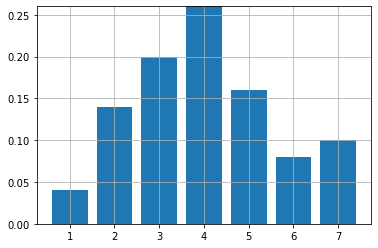

In [5]:
#гистограмма относительных частот
plt.bar([i for i in range(1,len(ind_lst)+1)],rel_f)
plt.ylim(None, round(max(rel_f),2))
print('Обозначения: ось х - список ниже; ось у - относительные частоты')
for i,v in enumerate(list(dic_row.keys())):
    print(f'{i+1} === {v}')
plt.grid()
plt.show()

Обозначения: ось х - список ниже; ось у - относительные частоты
1 === [-5.18;-4.28)
2 === [-4.28;-3.38)
3 === [-3.38;-2.48)
4 === [-2.48;-1.57)
5 === [-1.57;-0.67)
6 === [-0.67;0.23)
7 === [0.23;1.13)


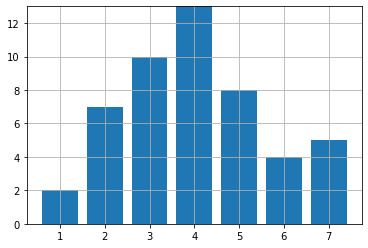

In [6]:
#гистограмма частот
plt.bar([i for i in range(1,len(ind_lst)+1)],f)
plt.ylim(None, round(max(f),2))
print('Обозначения: ось х - список ниже; ось у - относительные частоты')
for i,v in enumerate(list(dic_row.keys())):
    print(f'{i+1} === {v}')
plt.grid()
plt.show()

Обозначения: ось х - список ниже; ось у - накопленные относительные частоты
1 === [-5.18;-4.28)
2 === [-4.28;-3.38)
3 === [-3.38;-2.48)
4 === [-2.48;-1.57)
5 === [-1.57;-0.67)
6 === [-0.67;0.23)
7 === [0.23;1.13)


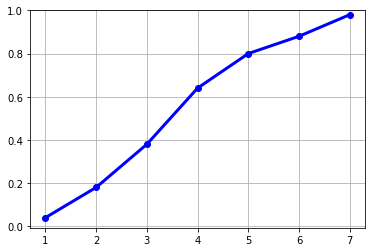

In [7]:
#кумулянта
ind_lst=list(dic_row.keys())
line=plt.plot([i for i in range(1,len(ind_lst)+1)],sum_rel)
plt.setp(line, color='blue', linewidth=3, marker='o')
plt.grid()
plt.ylim(None,round(max(sum_rel),1))
print('Обозначения: ось х - список ниже; ось у - накопленные относительные частоты')
for i,v in enumerate(list(dic_row.keys())):
    print(f'{i+1} === {v}')
plt.show()

Обозначения: ось х - список ниже; ось у - относительные частоты
1 === [-5.18;-4.28)
2 === [-4.28;-3.38)
3 === [-3.38;-2.48)
4 === [-2.48;-1.57)
5 === [-1.57;-0.67)
6 === [-0.67;0.23)
7 === [0.23;1.13)


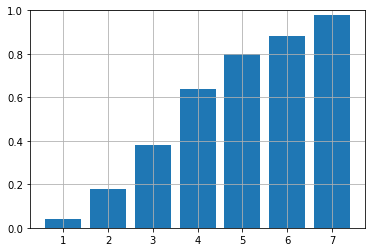

Функция распределения F(x). При рисовании на бумагу рисовать не столбики, 
а линии, начала которых выкололотые, а концы нормальные (как ступеньки но без вертикальных линий)
F(x) = 0 при x<=-5.18
F(x) = 0.04 при -5.18<x<=-4.28
F(x) = 0.18 при -4.28<x<=-3.38
F(x) = 0.38 при -3.38<x<=-2.48
F(x) = 0.64 при -2.48<x<=-1.57
F(x) = 0.8 при -1.57<x<=-0.67
F(x) = 0.88 при -0.67<x<=0.23
F(x) = 0.98 при 0.23<x<=1.13
F(x) = 1 при x>1.13


In [8]:
#эмпирическая функция распределения
plt.bar([i for i in range(1,len(ind_lst)+1)],sum_rel)
plt.ylim(None, round(max(sum_rel),1))
print('Обозначения: ось х - список ниже; ось у - относительные частоты')
for i,v in enumerate(list(dic_row.keys())):
    print(f'{i+1} === {v}')
plt.grid()
plt.show()
func_lst=[]
func_lst.append(f'F(x) = 0 при x<={knots[0]}')
for i in range(len(knots)-1):
    func_lst.append(f'F(x) = {sum_rel[i]} при {knots[i]}<x<={knots[i+1]}')
func_lst.append(f'F(x) = 1 при x>{knots[len(knots)-1]}')
print('''Функция распределения F(x). При рисовании на бумагу рисовать не столбики, 
а линии, начала которых выкололотые, а концы нормальные (как ступеньки но без вертикальных линий)''')
print(*func_lst, sep='\n')